<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [27]:

df = pd.read_csv('data.csv' ,sep = ',')
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [28]:
# categorical = df.dtypes == 'obejct'

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [29]:
df[categorical].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [30]:
df.replace(' ?', np.NaN, inplace=True)
df.dropna(inplace=True)

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [31]:
X = df.drop('income', axis =1)
y = df[['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [32]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()



C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15977,44,1,0,0,0,0,0,0,222978,1,...,0,0,0,0,0,0,0,0,0,0
13574,32,1,0,0,0,0,0,0,83253,0,...,0,0,0,0,0,0,0,0,0,0
23210,30,0,1,0,0,0,0,0,327825,1,...,0,0,0,0,0,0,0,0,0,0
9284,23,1,0,0,0,0,0,0,109952,0,...,0,0,0,0,0,0,0,0,0,0
8841,54,0,1,0,0,0,0,0,204325,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train.shape

(21113, 104)

In [34]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
2135,44,1,0,0,0,0,0,0,81853,1,...,0,0,0,0,0,0,0,0,0,0
15639,21,1,0,0,0,0,0,0,306114,0,...,0,0,0,0,0,0,0,0,0,0
29059,36,1,0,0,0,0,0,0,186110,0,...,0,0,0,0,0,0,0,0,0,0
27523,30,0,0,1,0,0,0,0,45427,0,...,0,0,0,0,0,0,0,0,0,0
9280,42,0,0,1,0,0,0,0,133584,0,...,0,0,0,0,0,0,0,0,0,0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score: 0.7833
Training-set accuracy score: 0.7925
Training set score: 0.7925
Test set score: 0.7833
income
 <=50K    6764
 >50K     2285
dtype: int64 

Null accuracy score: 0.7475

Confusion matrix

 [[6423  341]
 [1620  665]]

True Positives(TP) =  6423

True Negatives(TN) =  665

False Positives(FP) =  341

False Negatives(FN) =  1620


Text(0.5, 1.0, 'Confusion matrix')

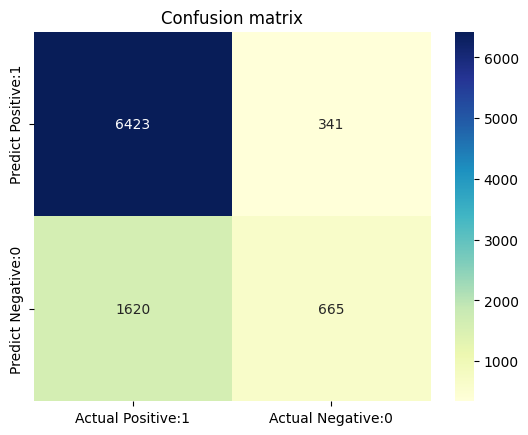

In [35]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred

from sklearn.metrics import accuracy_score,confusion_matrix

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

print(y_test.value_counts(),'\n')

null_accuracy = (6764/(6764+2285))

print('Null accuracy score: {0:0.4f}\n'. format(null_accuracy))

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion matrix")

Wynikiem obliczenia macierzy błędu możemy stwierdzić, że mamy 
7088 wyników prawidłowo przewidzianych, oraz 1961 wyników nieprawidłowo przeiwdzianych.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

## Dla kolumny race

C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\

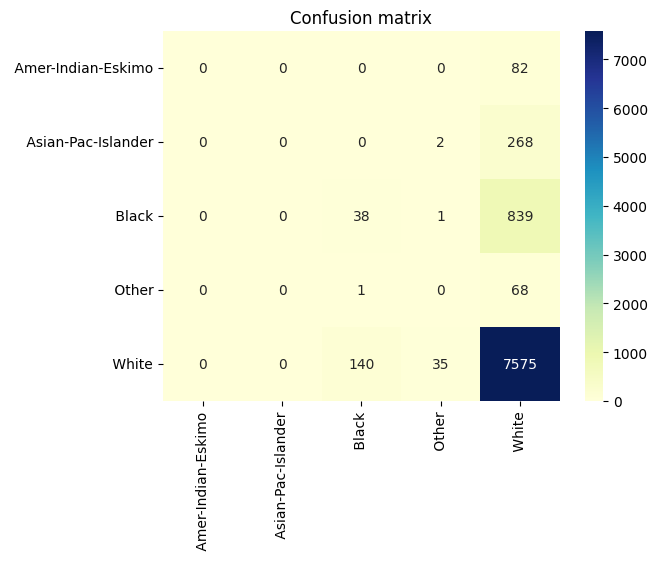

Model accuracy score: 0.8413
Training-set accuracy score: 0.8461
Training set score: 0.8461
Test set score: 0.8413
race               
 White                 7750
 Black                  878
 Asian-Pac-Islander     270
 Amer-Indian-Eskimo      82
 Other                   69
dtype: int64 



In [36]:
X = df.drop('race', axis=1)
y = df[['race']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)

cm_matrix = pd.DataFrame(data=cm,index = gnb.classes_,columns = gnb.classes_)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion matrix")

plt.show()

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

print(y_test.value_counts(),'\n')

C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Mithrandir\AppData\

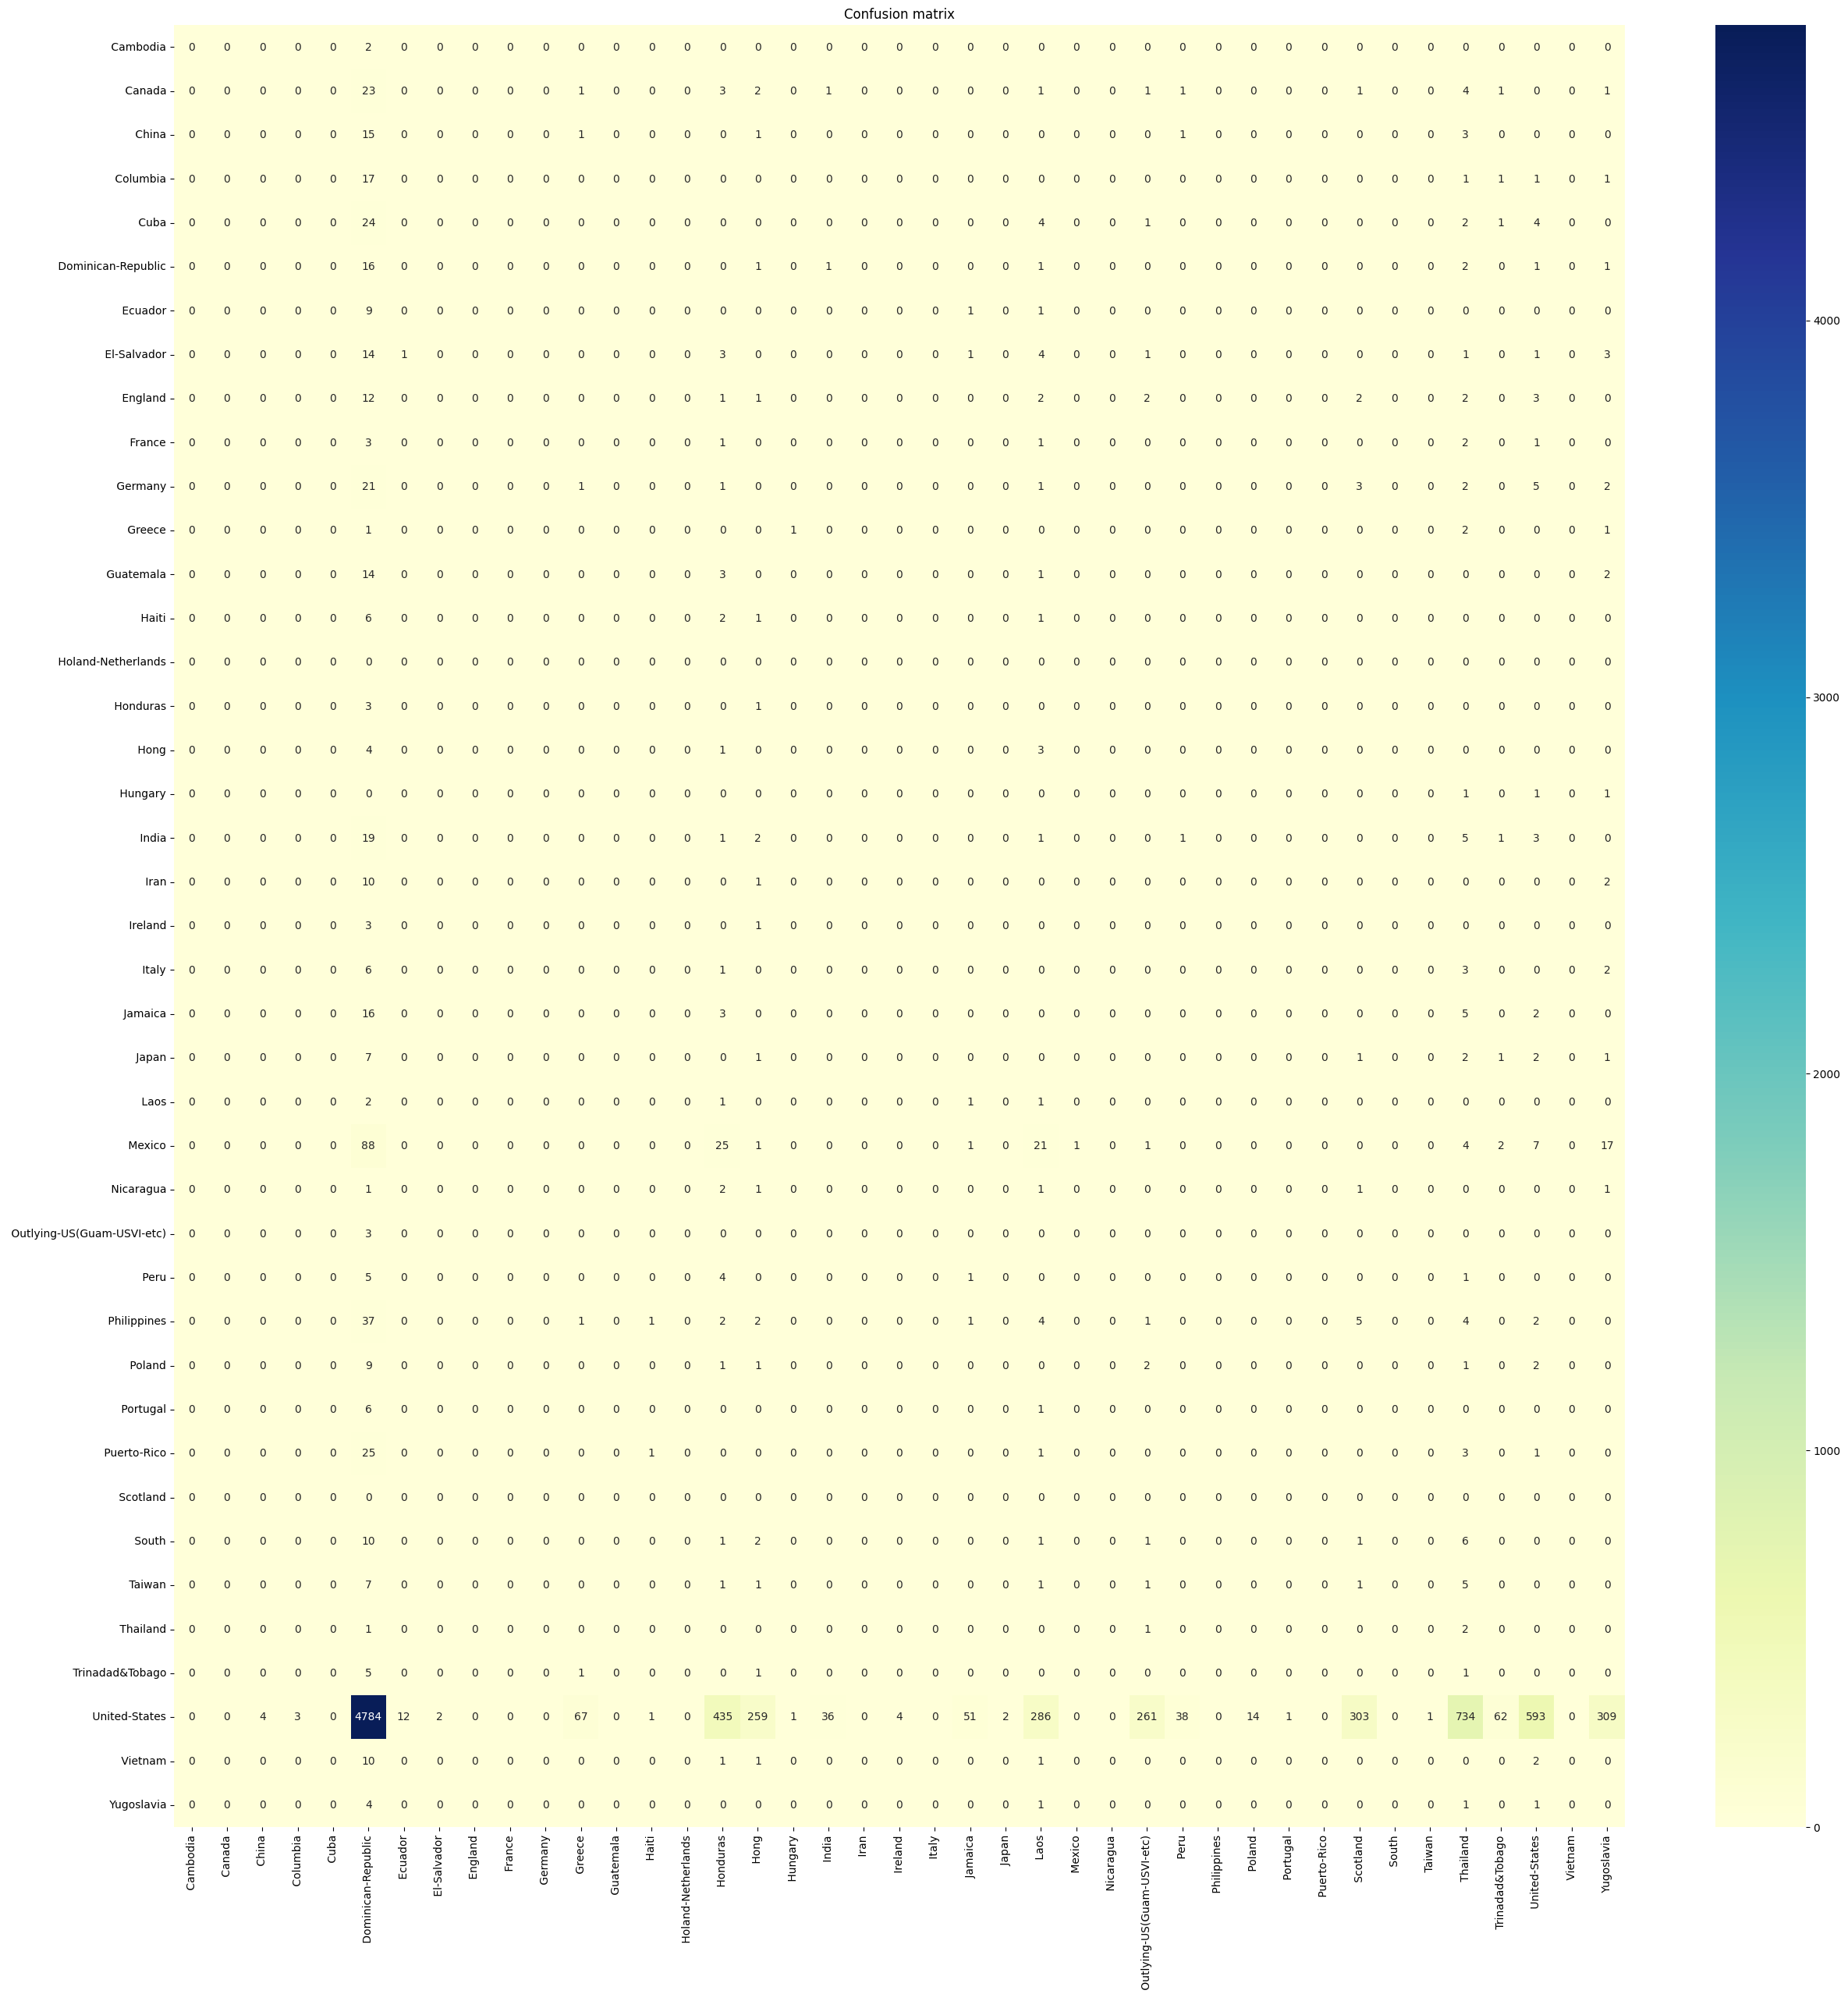

Model accuracy score: 0.0677
Training-set accuracy score: 0.0681
Training set score: 0.0681
Test set score: 0.0677
native_country             
 United-States                 8263
 Mexico                         168
 Philippines                     60
 Canada                          40
 Cuba                            36
 Germany                         36
 India                           33
 Puerto-Rico                     31
 El-Salvador                     29
 Jamaica                         26
 England                         25
 Dominican-Republic              23
 South                           22
 China                           21
 Columbia                        21
 Guatemala                       20
 Taiwan                          17
 Poland                          16
 Vietnam                         15
 Japan                           15
 Iran                            13
 Italy                           12
 Ecuador                         11
 Peru                        

In [37]:
df['native_country'].replace('?', np.NaN, inplace=True)
X = df.drop('native_country', axis=1)
y = df[['native_country']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
df_cm = pd.DataFrame(cm, index = gnb.classes_,columns = gnb.classes_)
plt.figure(figsize=(30,30))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix')
plt.show()

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

print(y_test.value_counts(),'\n')

Na podstawie przeprowadzonej analizy dla kolumn race i native_country, możemy stwierdzić, że wyniki zależą od liczności klasy. Model, w przypadku danych dla kolumny native_country ma zbyt mało danych (jest zdominowany przez amerykanów), przez co jego dokładność jest bardzo słaba, włąsciwie można powiedzieć że nie rozpoznaje w ogóle prawidłowych danych.